In [279]:
import pandas as pd

In [280]:
train_df = pd.read_excel('train.xlsx')
train_df = train_df.sort_values(by='dt')
train_df.describe()

,dt,Цена на арматуру
count,400,400.000000
mean,2018-11-01 12:00:00,39229.475000
min,2015-01-05 00:00:00,21000.000000
25%,2016-12-03 06:00:00,31075.000000
50%,2018-11-01 12:00:00,35450.000000
75%,2020-09-29 18:00:00,42000.000000
max,2022-08-29 00:00:00,79000.000000
std,NaN,13407.979668


In [281]:
train_df.head(13)

,dt,Цена на арматуру
0,2015-01-05,32900
1,2015-01-12,32500
2,2015-01-19,32000
3,2015-01-26,30700
4,2015-02-02,30300
5,2015-02-09,30300
6,2015-02-16,30100
7,2015-02-23,29400
8,2015-03-02,29200
9,2015-03-09,29000


In [282]:
train_df.isna().sum()

,0
dt,0
Цена на арматуру,0


In [283]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   dt                400 non-null    datetime64[ns]
 1   Цена на арматуру  400 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.4 KB


In [284]:
train_df.set_index('dt', inplace=True)

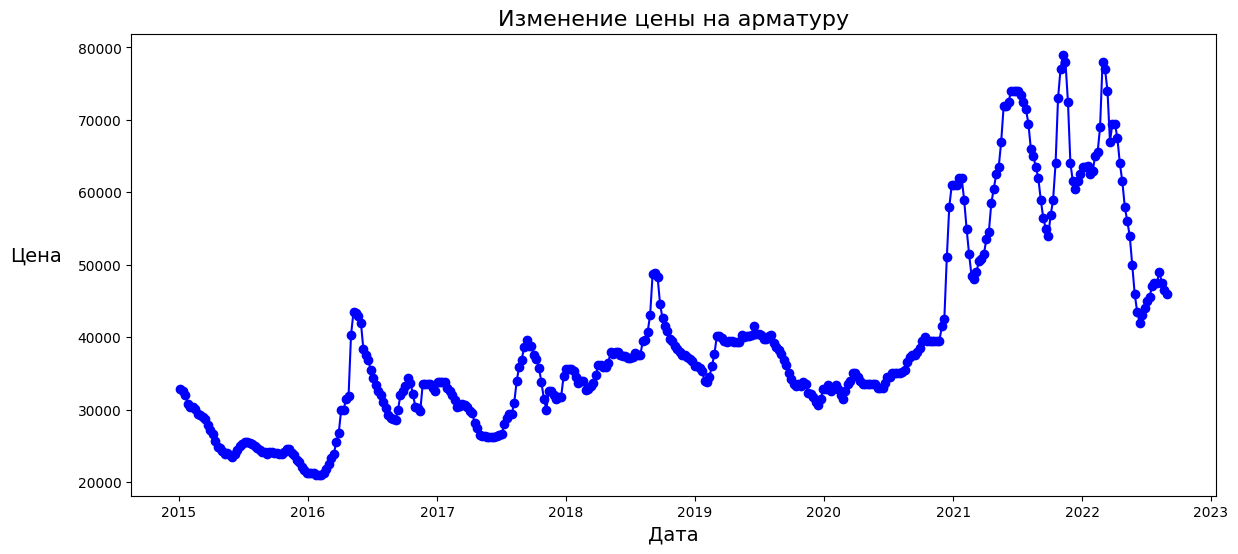

In [285]:
import matplotlib.pyplot as plt

# Рассмотрим изменение цены
plt.figure(figsize=(14, 6))
plt.title('Изменение цены на арматуру', fontsize=16)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Цена', rotation=0, labelpad=30, fontsize=14)
plt.plot(train_df.index, train_df['Цена на арматуру'], marker='o', linestyle='-', color='b')

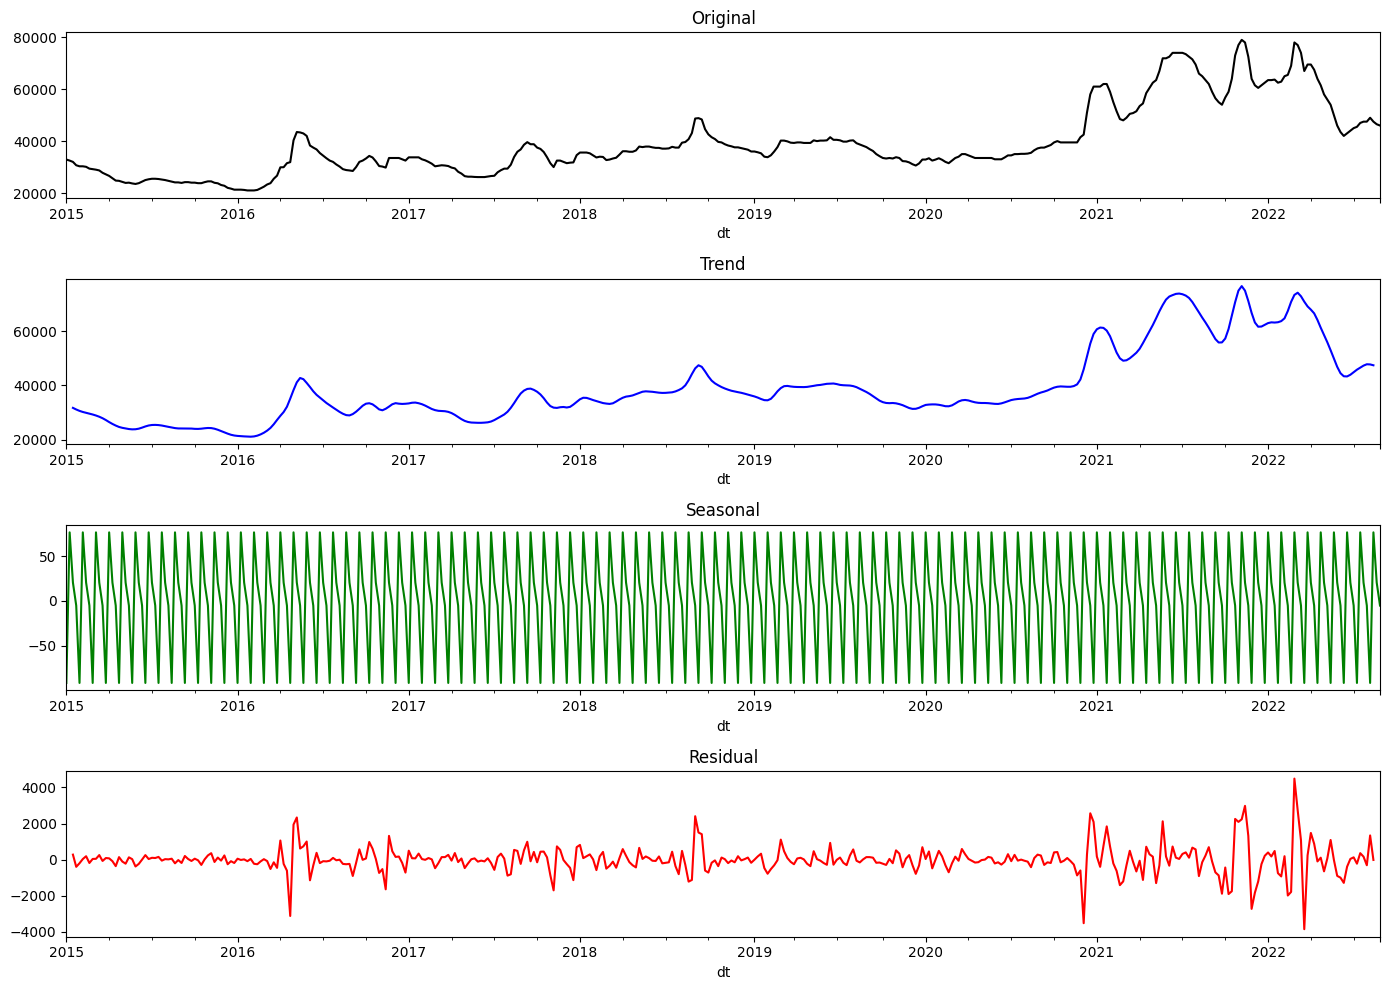

In [286]:
# Разложим ряд на компоненты и ответим: Есть ли у данного ряда тренд? Есть ли у данного ряда сезонность?

from statsmodels.tsa.seasonal import seasonal_decompose

# Выполняем декомпозицию
decomposition = seasonal_decompose(train_df["Цена на арматуру"], model="additive", period=4)

# Визуализация
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 10))
ax[0].set_title("Original")
ax[1].set_title("Trend")
ax[2].set_title("Seasonal")
ax[3].set_title("Residual")

decomposition.observed.plot(ax=ax[0], color="black")
decomposition.trend.plot(ax=ax[1], color="blue")
decomposition.seasonal.plot(ax=ax[2], color="green")
decomposition.resid.plot(ax=ax[3], color="red")

plt.tight_layout()
plt.show()

In [287]:
from statsmodels.tsa.stattools import adfuller
# Проверка стационарности
adf_test = adfuller(train_df["Цена на арматуру"])
print(f"ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}")

ADF Statistic: -1.9258699893713456, p-value: 0.31999061025699155


автокорреляция

In [288]:
from statsmodels.tsa.stattools import acf

acf(train_df['Цена на арматуру'], nlags=60, fft=False)

array([1.        , 0.99138242, 0.97367714, 0.95122039, 0.92740427,
       0.90357365, 0.88126621, 0.8606089 , 0.84235253, 0.82671727,
       0.81349611, 0.8020525 , 0.7925797 , 0.78508849, 0.78019657,
       0.77692922, 0.77376814, 0.76901294, 0.76227632, 0.75319077,
       0.74261145, 0.7309889 , 0.71862345, 0.7046383 , 0.68939965,
       0.67325908, 0.65612584, 0.63820561, 0.62109396, 0.60459259,
       0.58872289, 0.57435372, 0.56120831, 0.54900152, 0.5377084 ,
       0.5271632 , 0.51674918, 0.5068141 , 0.49691253, 0.48636205,
       0.47460061, 0.4600824 , 0.44257206, 0.42285538, 0.40223733,
       0.38033844, 0.35769402, 0.33517203, 0.31316745, 0.29306128,
       0.27522925, 0.2595102 , 0.24447201, 0.23086215, 0.21896621,
       0.20859445, 0.1993889 , 0.19088593, 0.18300826, 0.1757314 ,
       0.16880023])

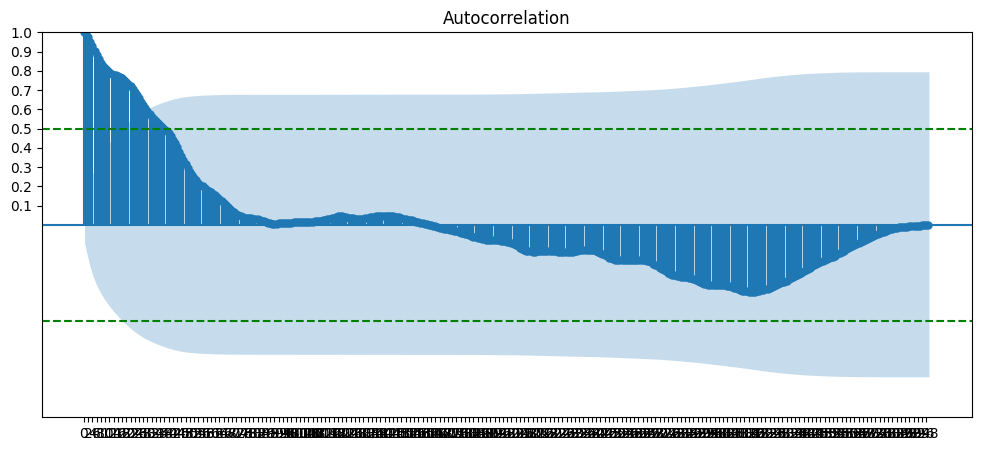

In [289]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

# Создаем график
fig, ax = plt.subplots(figsize=(12, 5))  # Уменьшил размер для удобства

# Строим ACF с корректным числом лагов
plot_acf(train_df['Цена на арматуру'], lags=len(train_df) - 1, ax=ax)

# Настройки осей
plt.xticks(np.arange(0, len(train_df), 2))  # Метки по оси X через 2 точки
plt.yticks(np.arange(0.1, 1.1, 0.1))  # Метки по оси Y
plt.axhline(y=0.5, color="green", linestyle="--")  # Линия на 0.5
plt.axhline(y=-0.5, color="green", linestyle="--")  # Линия на -0.5
plt.show()


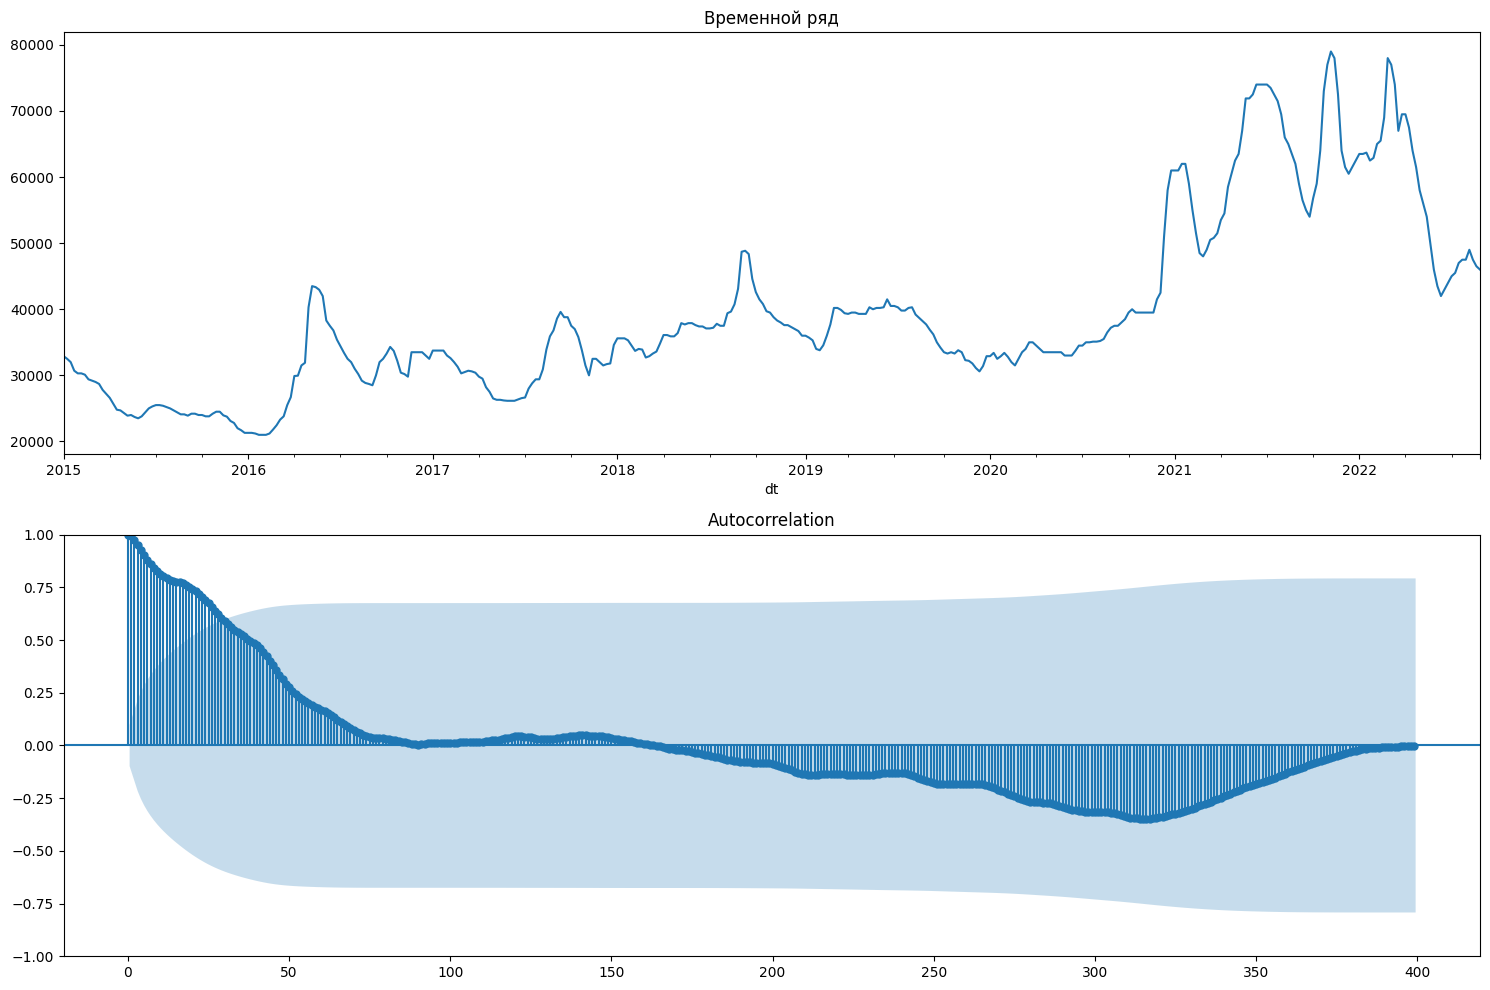

In [290]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))

# График временного ряда
train_df['Цена на арматуру'].plot(ax=ax[0], title="Временной ряд")

# График автокорреляции (с корректным числом лагов)
plot_acf(train_df['Цена на арматуру'], lags=len(train_df)-1, ax=ax[1])

plt.tight_layout()
plt.show()

In [291]:
test_df = pd.read_excel('test.xlsx')

Модель линейной регрессии

In [292]:
train_df['dt'] = (train_df.index - train_df.index.min()).days

X_train, y_train = train_df[["dt"]], train_df["Цена на арматуру"]
X_test, y_test = train_df[["dt"]], train_df["Цена на арматуру"]

In [293]:
from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)

linreg_preds = linreg_model.predict(X_test)

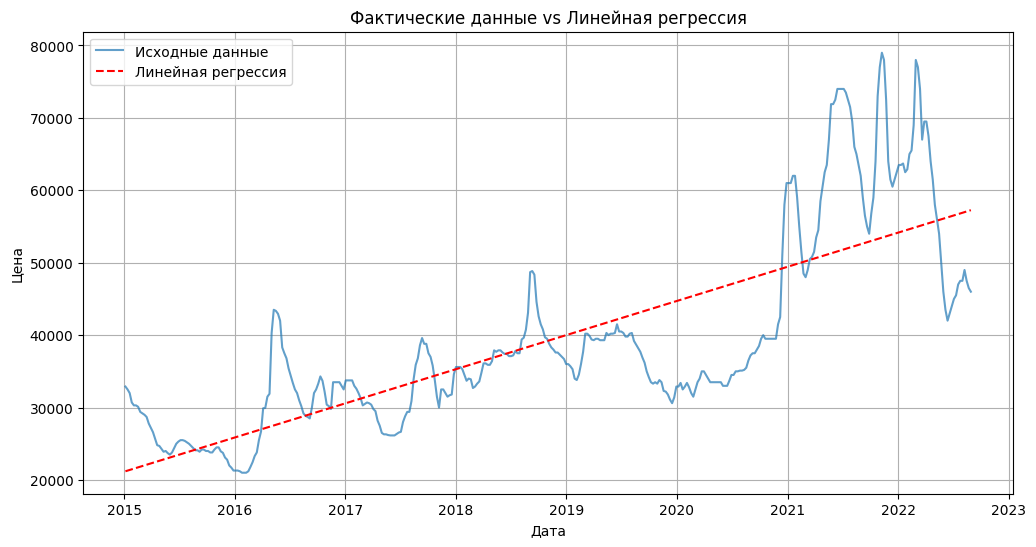

In [294]:
plt.figure(figsize=(12, 6))
plt.plot(train_df.index, train_df['Цена на арматуру'], label='Исходные данные', alpha=0.7)
plt.plot(train_df.index, linreg_preds, label='Линейная регрессия', linestyle='dashed', color='red')
plt.title("Фактические данные vs Линейная регрессия")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.legend()
plt.grid()
plt.show()

In [295]:
from sklearn.metrics import r2_score, mean_absolute_error

rlinreg_mae = mean_absolute_error(y_test, linreg_preds)
linreg_r2 = r2_score(y_test, linreg_preds)

In [296]:
linreg_r2

0.6071528257338863

In [297]:
rlinreg_mae

6309.980682823018

CatBoost

Модель  ARIMA

In [298]:
series = train_df['Цена на арматуру'].values

In [299]:
optimal_lags = int(np.sqrt(len(series)))

In [300]:
from statsmodels.tsa.ar_model import AutoReg
ar = AutoReg(series, lags=optimal_lags).fit()

In [301]:
start = len(series)
end = start + 28 - 1

prediction = ar.predict(start=start, end=end, dynamic=False)
prediction

array([46064.01159049, 45599.40787414, 45114.34708792, 44431.62984064,
       43790.949795  , 43657.80765202, 43701.1060591 , 43783.59011757,
       43944.58742431, 44123.61290827, 44410.08276635, 44819.64299229,
       45227.72906895, 45238.78368281, 45260.22812788, 45173.80588097,
       45207.53212654, 45209.89289482, 45201.18484358, 45045.28327012,
       44880.25655071, 44745.35762771, 44653.09733264, 44578.76238464,
       44514.80170549, 44448.2100294 , 44447.00901354, 44500.31396538])

In [302]:
test_df["Цена на арматуру"] = prediction
test_df

,dt,Цена на арматуру
0,2022-09-05,46064.011590
1,2022-09-12,45599.407874
2,2022-09-19,45114.347088
3,2022-09-26,44431.629841
4,2022-10-03,43790.949795
5,2022-10-10,43657.807652
6,2022-10-17,43701.106059
7,2022-10-24,43783.590118
8,2022-10-31,43944.587424
9,2022-11-07,44123.612908


In [303]:
test_df = test_df.set_index(['dt'])
test_df

,Цена на арматуру
dt,
2022-09-05,46064.011590
2022-09-12,45599.407874
2022-09-19,45114.347088
2022-09-26,44431.629841
2022-10-03,43790.949795
2022-10-10,43657.807652
2022-10-17,43701.106059
2022-10-24,43783.590118
2022-10-31,43944.587424


In [304]:
train_size = int(len(series) * 0.8)

df_train = train_df["Цена на арматуру"].iloc[:train_size]
df_test = train_df["Цена на арматуру"].iloc[train_size:]

In [305]:
optimal_lags = int(np.sqrt(len(series)))

In [306]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ARIMA модель
p, d, q = 2, 1, 2
train_data, val_data = train_df.iloc[:int(len(train_df)*0.9)], train_df.iloc[int(len(train_df)*0.9):]
model_arima = ARIMA(train_data["Цена на арматуру"], order=(p, d, q))
model_fit = model_arima.fit()
forecast = model_fit.forecast(steps=len(val_data))
mae_arima = mean_absolute_error(val_data["Цена на арматуру"], forecast)
mse_arima = mean_squared_error(val_data["Цена на арматуру"], forecast)
rmse_arima = np.sqrt(mse_arima)
mape_arima = np.mean(np.abs((val_data["Цена на арматуру"] - forecast) / val_data["Цена на арматуру"])) * 100
smape_arima = 100 * np.mean(2 * np.abs(forecast - val_data["Цена на арматуру"]) / (np.abs(forecast) + np.abs(val_data["Цена на арматуру"])))
print(f"ARIMA MAE: {mae_arima}, MSE: {mse_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}, SMAPE: {smape_arima}")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


ARIMA MAE: 11017.969003605887, MSE: 191436820.67752478, RMSE: 13836.069553074847, MAPE: 22.209908054962806, SMAPE: 18.766605624632447


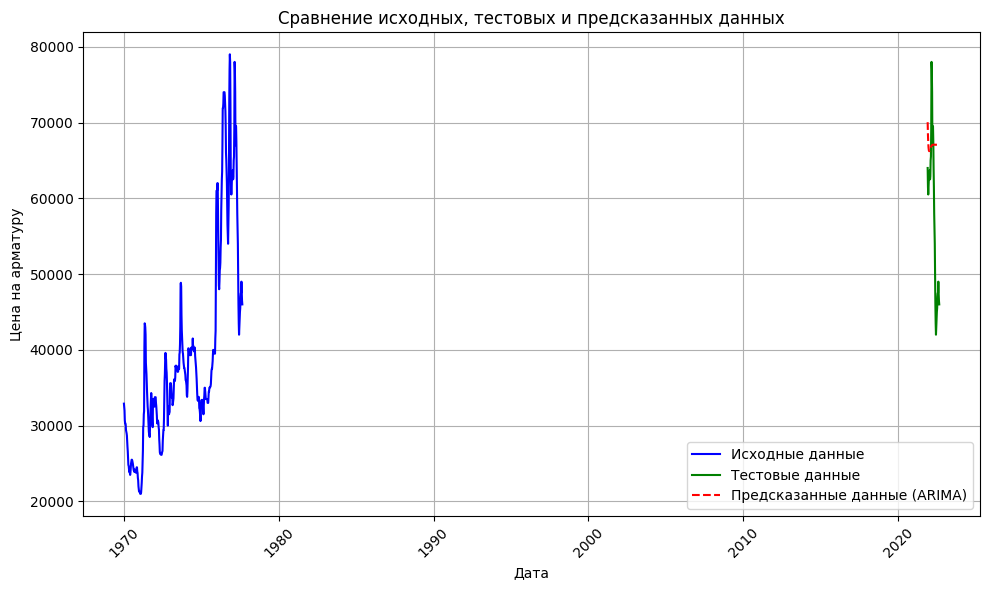

In [307]:
import matplotlib.pyplot as plt

# Прогнозируемые значения
forecast_index = val_data.index
forecast_values = forecast

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(train_df['dt'], train_df["Цена на арматуру"], label="Исходные данные", color='blue')
plt.plot(val_data.index, val_data["Цена на арматуру"], label="Тестовые данные", color='green')
plt.plot(forecast_index, forecast_values, label="Предсказанные данные (ARIMA)", color='red', linestyle='--')

# Добавление подписей и легенды
plt.title('Сравнение исходных, тестовых и предсказанных данных')
plt.xlabel('Дата')
plt.ylabel('Цена на арматуру')
plt.legend()

# Отображение графика
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
